### Installing packages
To install a package on your device, first open the Command Prompt by typing cmd in the search box. <br><br>
Windows users type the following command - <br> 
py -m pip install "package_name"

In [1]:
# To supress warnings
import warnings
warnings.filterwarnings('ignore')

# For data manipulation
import pandas as pd

# For array manipulation
import numpy as np

# To split the data for training and validation
from sklearn.model_selection import train_test_split

# To standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Deep learning library we'll use
import keras

# To get the datasets
from keras.datasets import boston_housing, mnist

# For one-hot encoding
from keras.utils.np_utils import to_categorical

# To make a sequential model with multiple processing layers
from keras.models import Sequential

# To make a deeply (fully) connected layer
from keras.layers import Dense, Dropout

# For defining the loss function
from keras.losses import MeanSquaredError, MeanAbsoluteError

# To define the optimizer
from keras.optimizers import Adadelta, Adam, SGD, RMSprop

# To make plots
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Regression
### Loading the data
We will use the Boston Housing data for training our model. The data consists of 13-dimensional input, 12 of which are continuous, and one is a binary variable. The output is a continuous scalar giving the median value of owner-occupied homes in \$1000s.<br><br>
Read the decription of the features below. Can you guess which is the binary variable? 
#### Description of the input features
1. Per capita crime rate by town <br>
2. Proportion of residential land zoned for lots over 25,000 sq. ft <br>
3. Proportion of non-retail business acres per town <br>
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
5. Nitric oxide concentration (parts per 10 million) <br>
6. Average number of rooms per dwelling <br>
7. Proportion of owner-occupied units built prior to 1940 <br>
8. Weighted distances to five Boston employment centers <br>
9. Index of accessibility to radial highways <br>
10. Full-value property tax rate per \$10,000 <br>
11. Pupil-teacher ratio by town <br>
12. 1000(Bk - 0.63)², where Bk is the proportion of blacks by town <br>
13. Percentage of lower status of the population <br>

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split = 0.2, seed = 42)

print(f"There are {X_train.shape[0]} records in the training set.")
print(f"There are {X_test.shape[0]} records in the testing set.")
print(f"The length of the input feature vector is {X_train.shape[1]}.")

i = 0
print(f"\nExample of an input-output pair - \nx = {X_train[i].tolist()} \ny = {y_train[i].tolist()}")

There are 404 records in the training set.
There are 102 records in the testing set.
The length of the input feature vector is 13.

Example of an input-output pair - 
x = [0.09178, 0.0, 4.05, 0.0, 0.51, 6.416, 84.1, 2.6463, 5.0, 296.0, 16.6, 395.5, 9.04] 
y = 23.6


### Making a train-validation split
We will use a 75-25 split in the training dataset, which corresponds to a 60-20-20 split between train-validation-test sets.

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

print(f"There are {X_train.shape[0]} records in the training set.")
print(f"There are {X_val.shape[0]} records in the validation set.")

There are 303 records in the training set.
There are 101 records in the validation set.


### Standardizing the data
Standardizing the data means to, for each feature, subtract the sample mean and divide by the sample standard deviation. This is also called feature standardization. <br>
$$z = \frac{x-\mu}{\sigma}$$ 
$$\mu = \frac{1}{N}\sum_{i=1}^{N}X_i$$ 
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_i-\mu)^2}$$ <br>
The reason is that variables that are measured at different scales do not contribute equally to the model fitting and model learned function, and might end up creating a bias. <br><br>
Remember to always fit the scaler on the training data, and use the same scaler for training, validation and testing sets, i.e., the mean and the standard deviation we use comes from the training set. This is because while training we don't access the validation or the testing data. So we have to use the mean and standard deviation coming from the training set. And since we have scaled the inputs according to these parameters during training, we have to use the same parameters while validating and testing as well.

In [4]:
i = 0
print(f"Example of an input before scaling - \nx = {X_train[i].tolist()}")

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nThe same input after scaling - \nX_scaled = {[round(x, 4) for x in X_train_scaled[i]]}")

Example of an input before scaling - 
x = [24.8017, 0.0, 18.1, 0.0, 0.693, 5.349, 96.0, 1.7028, 24.0, 666.0, 20.2, 396.9, 19.77]

The same input after scaling - 
X_scaled = [2.0301, -0.49, 0.9458, -0.2999, 1.1952, -1.3464, 0.9412, -0.9558, 1.6195, 1.4796, 0.8079, 0.4516, 0.96]


### Model architecture

In [5]:
def ModelRegression(hidden_layer_sizes = [16, 8, 4], 
                    num_input_features = 13, 
                    loss_fn = MeanSquaredError(reduction = 'sum_over_batch_size'), 
                    optimizer = Adam(learning_rate = 1e-3), 
                    metrics = []):
    
    model = Sequential(name = "Regression")
    
    model.add(Dense(hidden_layer_sizes[0], input_dim = num_input_features, activation = 'relu', name = 'hidden_1'))
    
    for i, hidden_layer_size in enumerate(hidden_layer_sizes[1:], 2):
        model.add(Dense(hidden_layer_size, activation = 'relu', name = f'hidden_{i}'))
        
    model.add(Dense(1, name = 'output'))
    
    model.compile(loss = loss_fn, optimizer = optimizer, metrics = metrics)
    
    return model

### Tuning model parameters
We strongly encourage you to play with model parameters. For example, 
1. Try changing the hidden layer sizes, or adding additional layers
2. Try using other loss functions (hint: check which ones we have imported)
3. Try using other optimizers (hint: check which ones we have imported)

Note: To check which parameters a class takes, open the parenthesis and press shift+tab. Alternatively (recommended), you can check out the documentation of the class provided online.

Can you guess how many parameters the model has without running the cell below? You might need your calculators.

In [6]:
modelRegression = ModelRegression(hidden_layer_sizes = [16, 8, 4], 
                                  num_input_features = X_train_scaled.shape[1], 
                                  loss_fn = MeanSquaredError(reduction = 'sum_over_batch_size'), 
                                  optimizer = Adam(learning_rate = 1e-3), 
                                  metrics = [])

modelRegression.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 16)                224       
_________________________________________________________________
hidden_2 (Dense)             (None, 8)                 136       
_________________________________________________________________
hidden_3 (Dense)             (None, 4)                 36        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


### Training
We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size). Generally the bigger the batch, the more stable our stochastic gradient descent updates will be. However, bigger batch sizes also take a long time to process. We have to select an optimal value, balancing the number of iterations and time taken for each iteration.

In [7]:
historyRegression = modelRegression.fit(X_train_scaled, 
                                        y_train, 
                                        epochs = 100, 
                                        batch_size = 16, 
                                        verbose = 1, 
                                        validation_data = (X_val_scaled, y_val))

Epoch 1/100
19/19 [==============================] - 0s 22ms/step - loss: 562.6047 - val_loss: 544.1933
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 542.1061 - val_loss: 522.1093
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 515.1313 - val_loss: 492.5266
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 479.8660 - val_loss: 452.7579
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 433.2690 - val_loss: 398.8309
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 366.9368 - val_loss: 312.5189
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 266.6277 - val_loss: 200.6472
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 162.9168 - val_loss: 114.1597
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 96.1466 - val_loss: 69.3074
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 

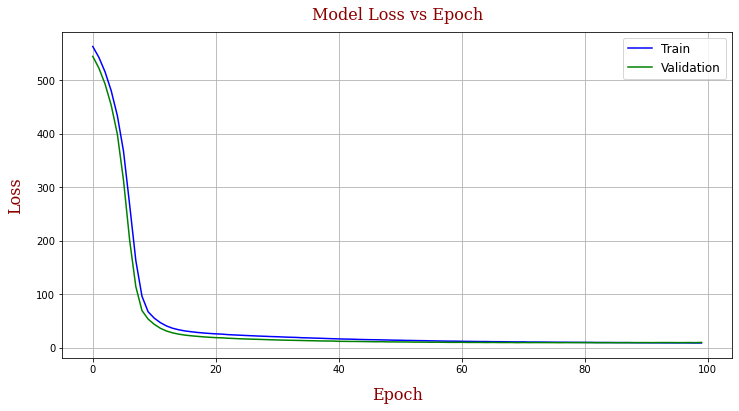

In [8]:
fontdict = {'family':'serif', 'color':'darkred', 'weight':'normal', 'size': 16}

%matplotlib inline
# %matplotlib qt
plt.figure(figsize = (12, 6))
plt.xlabel("Epoch", fontdict = fontdict, labelpad = 12)
plt.ylabel("Loss", fontdict = fontdict, labelpad = 12)
plt.title("Model Loss vs Epoch", fontdict = fontdict, pad = 12)
plt.plot(historyRegression.history['loss'], color = 'b')
plt.plot(historyRegression.history['val_loss'], color = 'g')
plt.legend(['Train', 'Validation'], fontsize = 12, loc = 'upper right')
plt.grid()

Can you reason why the validation loss is less than the training loss at some epoch levels?

In [9]:
print(f"MSE on test set = {round(modelRegression.evaluate(X_test_scaled, y_test), 5)}")

4/4 [==============================] - 0s 3ms/step - loss: 15.7552
MSE on test set = 15.75523


### Adding regularization using dropout
Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. These units are not considered during a particular forward or backward pass.

#### But why use dropout?
A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.

In [10]:
def ModelRegressionDropout(hidden_layer_sizes = [16, 8, 4], 
                           num_input_features = 13, 
                           dropout_prob = 0.2,
                           loss_fn = MeanSquaredError(reduction = 'sum_over_batch_size'), 
                           optimizer = Adam(learning_rate = 1e-3), 
                           metrics = []):
    
    model = Sequential(name = "Regression_with_Dropout")
    
    model.add(Dense(hidden_layer_sizes[0], input_dim = num_input_features, activation = 'relu', name = 'hidden_1'))
    model.add(Dropout(dropout_prob, name = 'dropout_1'))
    
    for i, hidden_layer_size in enumerate(hidden_layer_sizes[1:], 2):
        model.add(Dense(hidden_layer_size, activation = 'relu', name = f'hidden_{i}'))
        model.add(Dropout(dropout_prob, name = f'dropout_{i}'))
        
    model.add(Dense(1, name = 'output'))
    
    model.compile(loss = loss_fn, optimizer = optimizer, metrics = metrics)
    
    return model

In [11]:
modelRegressionDropout = ModelRegressionDropout(hidden_layer_sizes = [16, 8, 4], 
                                                num_input_features = X_train_scaled.shape[1], 
                                                dropout_prob = 0.2,
                                                loss_fn = MeanSquaredError(reduction = 'sum_over_batch_size'), 
                                                optimizer = Adam(learning_rate = 1e-3), 
                                                metrics = [])

modelRegressionDropout.summary()

Model: "Regression_with_Dropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
hidden_2 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
hidden_3 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
output (Dense)               (None, 1)     

In [12]:
historyRegressionDropout = modelRegressionDropout.fit(X_train_scaled, 
                                                      y_train, 
                                                      epochs = 100, 
                                                      batch_size = 16, 
                                                      verbose = 1,
                                                      validation_data = (X_val_scaled, y_val))

Epoch 1/100
19/19 [==============================] - 0s 7ms/step - loss: 574.1732 - val_loss: 560.6602
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 559.5909 - val_loss: 542.2095
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 538.8913 - val_loss: 514.3804
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 502.6173 - val_loss: 475.9103
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 457.9432 - val_loss: 422.7727
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 395.4220 - val_loss: 353.1702
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 323.6122 - val_loss: 273.2708
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 274.8430 - val_loss: 198.3204
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 215.7753 - val_loss: 136.9394
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss:

Epoch 81/100
19/19 [==============================] - 0s 4ms/step - loss: 79.9167 - val_loss: 16.0912
Epoch 82/100
19/19 [==============================] - 0s 4ms/step - loss: 81.1609 - val_loss: 15.4336
Epoch 83/100
19/19 [==============================] - 0s 5ms/step - loss: 79.5602 - val_loss: 13.4638
Epoch 84/100
19/19 [==============================] - 0s 6ms/step - loss: 95.7288 - val_loss: 12.8852
Epoch 85/100
19/19 [==============================] - 0s 6ms/step - loss: 75.9542 - val_loss: 16.7429
Epoch 86/100
19/19 [==============================] - 0s 6ms/step - loss: 75.3170 - val_loss: 17.5540
Epoch 87/100
19/19 [==============================] - 0s 6ms/step - loss: 79.4462 - val_loss: 17.4138
Epoch 88/100
19/19 [==============================] - 0s 6ms/step - loss: 82.9246 - val_loss: 14.5896
Epoch 89/100
19/19 [==============================] - 0s 6ms/step - loss: 87.3448 - val_loss: 13.3156
Epoch 90/100
19/19 [==============================] - 0s 6ms/step - loss: 80.9857 

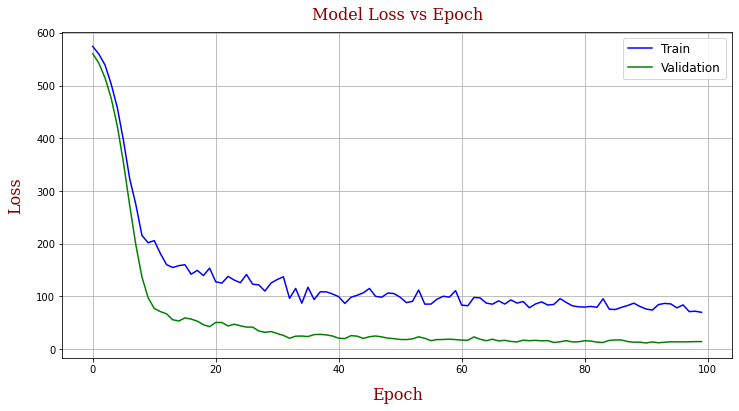

In [13]:
fontdict = {'family':'serif', 'color':'darkred', 'weight':'normal', 'size': 16}

plt.figure(figsize = (12, 6))
plt.xlabel("Epoch", fontdict = fontdict, labelpad = 12)
plt.ylabel("Loss", fontdict = fontdict, labelpad = 12)
plt.title("Model Loss vs Epoch", fontdict = fontdict, pad = 12)
plt.plot(historyRegressionDropout.history['loss'], color = 'b')
plt.plot(historyRegressionDropout.history['val_loss'], color = 'g')
plt.legend(['Train', 'Validation'], fontsize = 12, loc = 'upper right')
plt.grid()
plt.show()

In [14]:
print(f"MSE on test set = {round(modelRegressionDropout.evaluate(X_test_scaled, y_test), 5)}")

4/4 [==============================] - 0s 1ms/step - loss: 22.9519
MSE on test set = 22.95189


# Classification
### Loading the data
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database contains 60,000 training images and 10,000 testing images. The images are in grayscale and have size (28, 28).

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"There are {X_train.shape[0]} records in the training set.")
print(f"There are {X_test.shape[0]} records in the testing set.")
print(f"The shape of each input is {X_train[0].shape}.")

There are 60000 records in the training set.
There are 10000 records in the testing set.
The shape of each input is (28, 28).


### Making a train-validation split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

print(f"There are {X_train.shape[0]} records in the training set.")
print(f"There are {X_val.shape[0]} records in the validation set.")

There are 45000 records in the training set.
There are 15000 records in the validation set.


### Exploration

Let's inspect a few examples. The MNIST dataset contains only grayscale images. For more advanced image datasets, we'll have the three color channels (RGB).

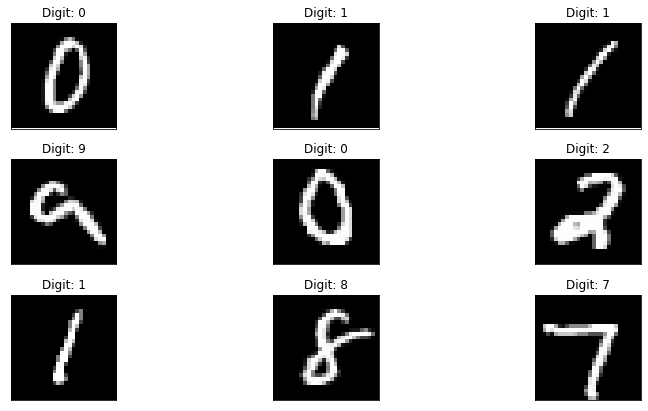

In [17]:
%matplotlib inline

plt.figure(figsize = (12, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plt.title(f"Digit: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])

In order to train our neural network to classify images we first have to unroll the height $\times$ width pixel format into one big vector - the input vector. So its length must be $28 \cdot 28 = 784$. But let's graph the distribution of our pixel values.

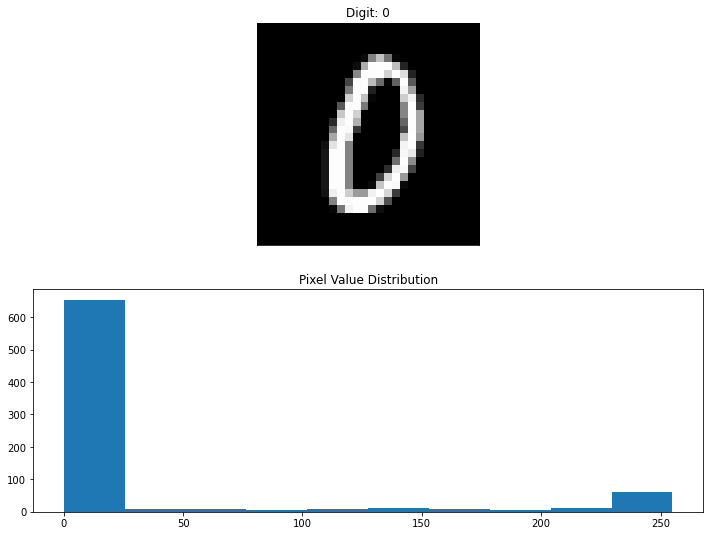

In [18]:
%matplotlib inline

i = 0
fig = plt.figure(figsize = (12, 9))

plt.subplot(2, 1, 1)
plt.imshow(X_train[0], cmap = 'gray', interpolation = 'none')
plt.title(f"Digit: {y_train[0]}")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 1, 2)
plt.hist(X_train[i].reshape(784))
plt.title("Pixel Value Distribution")

None

As expected, the pixel values range from 0 to 255: the background majority close to 0, and those close to 255 representing the digit.

### Normalizing the data
Normalizing the input data helps to speed up the training. Also, it reduces the chance of getting stuck in local optima, since we're using gradient descent to find the optimal weights for the network.

Let's reshape our inputs to a single vector and normalize the pixel values to lie between 0 and 1.

In [19]:
print(f"The shape of each input is {X_train[0].shape}.")

training_examples = X_train.shape[0]
X_train = X_train.reshape(training_examples, -1)

validation_examples = X_val.shape[0]
X_val = X_val.reshape(validation_examples, -1)

testing_examples = X_test.shape[0]
X_test = X_test.reshape(testing_examples, -1)

print(f"The length of each input is {np.squeeze(X_train[0].shape)}.")

The shape of each input is (28, 28).
The length of each input is 784.


In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [21]:
i = 0

np.set_printoptions(linewidth = 120)
print(f"\nExample of an input - \nx = \n{X_train[i].reshape(28, 28)}")

print(f"\nThe same input after scaling - \nx = \n{np.around(X_train_scaled[i].reshape(28, 28), 1)}")


Example of an input - 
x = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11 130 193 116   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  12 172 253 254 253 190  37   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 136 253 253 254 210 253 221  35   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  69 250 253 186 107   6  98 253  88   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 122 2

Now let's look at what the outputs look like

Label: 0, Count: 4428
Label: 1, Count: 5093
Label: 2, Count: 4487
Label: 3, Count: 4613
Label: 4, Count: 4399
Label: 5, Count: 4038
Label: 6, Count: 4436
Label: 7, Count: 4630
Label: 8, Count: 4406
Label: 9, Count: 4470


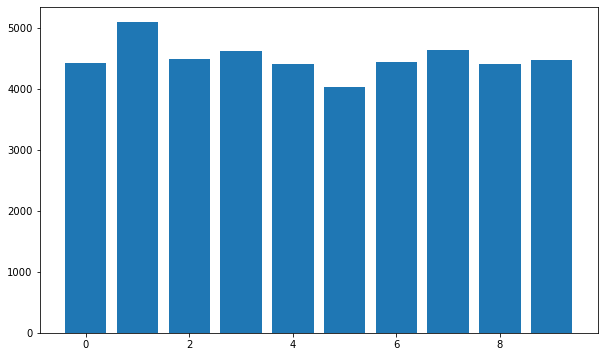

In [22]:
labels, counts = np.unique(y_train, return_counts = True)
for l, c in zip(labels, counts):
    print(f"Label: {l}, Count: {c}")
    
plt.figure(figsize = (10, 6))
plt.bar(labels, counts, )
plt.show()

We can see that the bar heights are pretty close, and therefore, there's very less (negligible) bias in the dataset.

### One-hot encoding
Let's encode our categories - digits from 0 to 9 - using one-hot encoding. The result is a vector with a length equal to the number of categories. The vector is all zeroes except in the position for the respective category. Thus a '5' will be represented by \[0,0,0,0,1,0,0,0,0\].

In [23]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_val = to_categorical(y_val, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (45000,)
Shape after one-hot encoding:  (45000, 10)


### Model architecture
#### Softmax activation
The Softmax regression is a form of logistic regression that normalizes an input value into a vector of values that follows a probability distribution whose total sums up to 1. The output values are between the range [0,1] which is nice because we are able to avoid binary classification and accommodate as many classes or dimensions in our neural network model. This is why softmax is sometimes referred to as a multinomial logistic regression. <br><br>
$$P(y=j|\theta)=\frac{e^{\theta_j}}{\sum_{i=1}^{k}e^{\theta_i}}$$
<br>where $\theta$ is the output vector of probabilities for each class, and $\theta_i$ is the $i^{th}$ component of this vector, giving the probability of output being the $i^{th}$ class.

In [24]:
def ModelClassification(hidden_layer_sizes = [512, 512], 
                        num_input_features = 784, 
                        dropout_prob = 0.2,
                        loss_fn = 'categorical_crossentropy', 
                        optimizer = Adam(learning_rate = 1e-3), 
                        metrics = ['accuracy']):
    
    model = Sequential(name = "Classification")
    
    model.add(Dense(hidden_layer_sizes[0], input_dim = num_input_features, activation = 'relu', name = 'hidden_1'))
    model.add(Dropout(dropout_prob, name = 'dropout_1'))
    
    for i, hidden_layer_size in enumerate(hidden_layer_sizes[1:], 2):
        model.add(Dense(hidden_layer_size, activation = 'relu', name = f'hidden_{i}'))
        model.add(Dropout(dropout_prob, name = f'dropout_{i}'))
        
    model.add(Dense(10, activation = 'softmax', name = 'output'))
    
    model.compile(loss = loss_fn, optimizer = optimizer, metrics = metrics)
    
    return model

In [25]:
modelClassification = ModelClassification(hidden_layer_sizes = [512, 512], 
                                          num_input_features = X_train_scaled.shape[1], 
                                          dropout_prob = 0.2,
                                          loss_fn = 'categorical_crossentropy', 
                                          optimizer = Adam(learning_rate = 1e-3), 
                                          metrics = ['accuracy'])

modelClassification.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [26]:
historyClassification = modelClassification.fit(X_train_scaled, 
                                                Y_train, 
                                                batch_size = 128, 
                                                epochs = 10, 
                                                verbose = 1,
                                                validation_data = (X_val_scaled, Y_val))

Epoch 1/10
352/352 [==============================] - 4s 11ms/step - loss: 0.2814 - accuracy: 0.9160 - val_loss: 0.1266 - val_accuracy: 0.9617
Epoch 2/10
352/352 [==============================] - 4s 11ms/step - loss: 0.1120 - accuracy: 0.9659 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 3/10
352/352 [==============================] - 5s 14ms/step - loss: 0.0790 - accuracy: 0.9750 - val_loss: 0.0872 - val_accuracy: 0.9750
Epoch 4/10
352/352 [==============================] - 4s 12ms/step - loss: 0.0580 - accuracy: 0.9814 - val_loss: 0.0840 - val_accuracy: 0.9760
Epoch 5/10
352/352 [==============================] - 4s 10ms/step - loss: 0.0489 - accuracy: 0.9837 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 6/10
352/352 [==============================] - 4s 10ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0832 - val_accuracy: 0.9763
Epoch 7/10
352/352 [==============================] - 4s 11ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0815 - val_accuracy: 0.9778

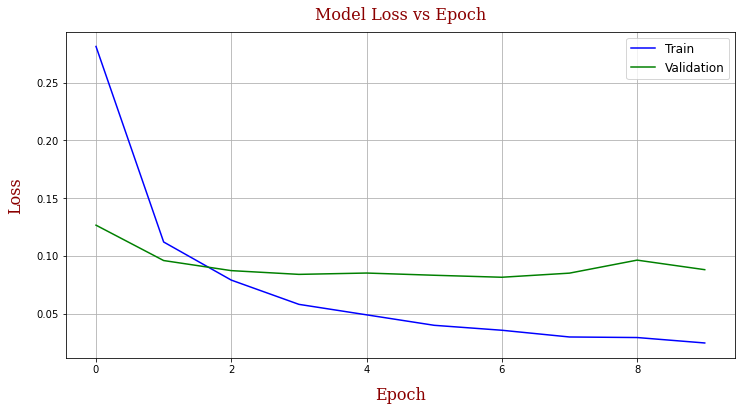

In [27]:
fontdict = {'family':'serif', 'color':'darkred', 'weight':'normal', 'size': 16}

plt.figure(figsize = (12, 6))
plt.xlabel("Epoch", fontdict = fontdict, labelpad = 12)
plt.ylabel("Loss", fontdict = fontdict, labelpad = 12)
plt.title("Model Loss vs Epoch", fontdict = fontdict, pad = 12)
plt.plot(historyClassification.history['loss'], color = 'b')
plt.plot(historyClassification.history['val_loss'], color = 'g')
plt.legend(['Train', 'Validation'], fontsize = 12, loc = 'upper right')
plt.grid()
plt.show()

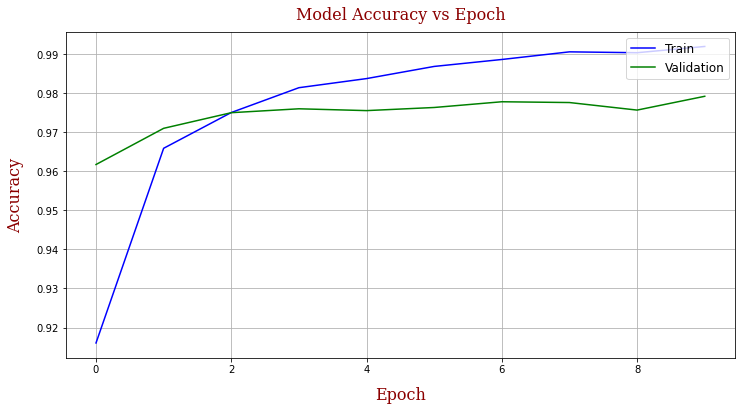

In [28]:
fontdict = {'family':'serif', 'color':'darkred', 'weight':'normal', 'size': 16}

plt.figure(figsize = (12, 6))
plt.xlabel("Epoch", fontdict = fontdict, labelpad = 12)
plt.ylabel("Accuracy", fontdict = fontdict, labelpad = 12)
plt.title("Model Accuracy vs Epoch", fontdict = fontdict, pad = 12)
plt.plot(historyClassification.history['accuracy'], color = 'b')
plt.plot(historyClassification.history['val_accuracy'], color = 'g')
plt.legend(['Train', 'Validation'], fontsize = 12, loc = 'upper right')
plt.grid()
plt.show()

#### Save the model for future use
Often times we need to train the model first, and then use it somewhere else for making predictions. For this we save the model, and load it whenever we need it.

In [29]:
modelClassification.save('classification_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: classification_model\assets


In [30]:
mnist_model = keras.models.load_model('classification_model')
mnist_model.summary()

Model: "Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [31]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss =", round(loss_and_metrics[0], 5))
print("Test Accuracy =", round(loss_and_metrics[1], 5))

313/313 - 1s - loss: 15.1972 - accuracy: 0.9813
Test Loss = 15.19721
Test Accuracy = 0.9813


This accuracy looks very good! But let's stay neutral here and evaluate both correctly and incorrectly classified examples. We'll look at 9 examples each.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
9813 example classified correctly


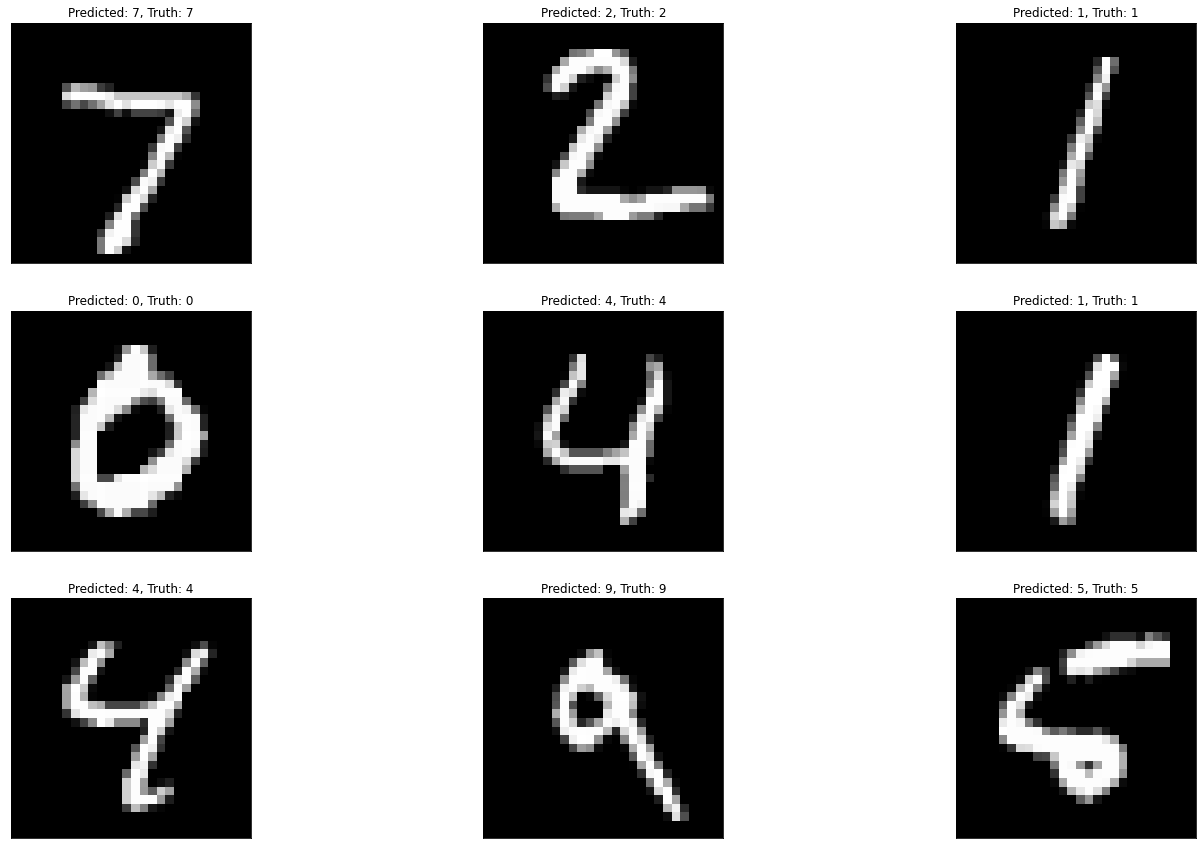

In [32]:
predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
print(len(correct_indices), "example classified correctly")

figure_evaluation = plt.figure(figsize = (24, 15))

for i, correct in enumerate(correct_indices[:9], 1):
    plt.subplot(3, 3, i)
    plt.imshow(X_test[correct].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title(f"Predicted: {predicted_classes[correct]}, Truth: {y_test[correct]}")
    plt.xticks([])
    plt.yticks([])

187 examples classified incorrectly


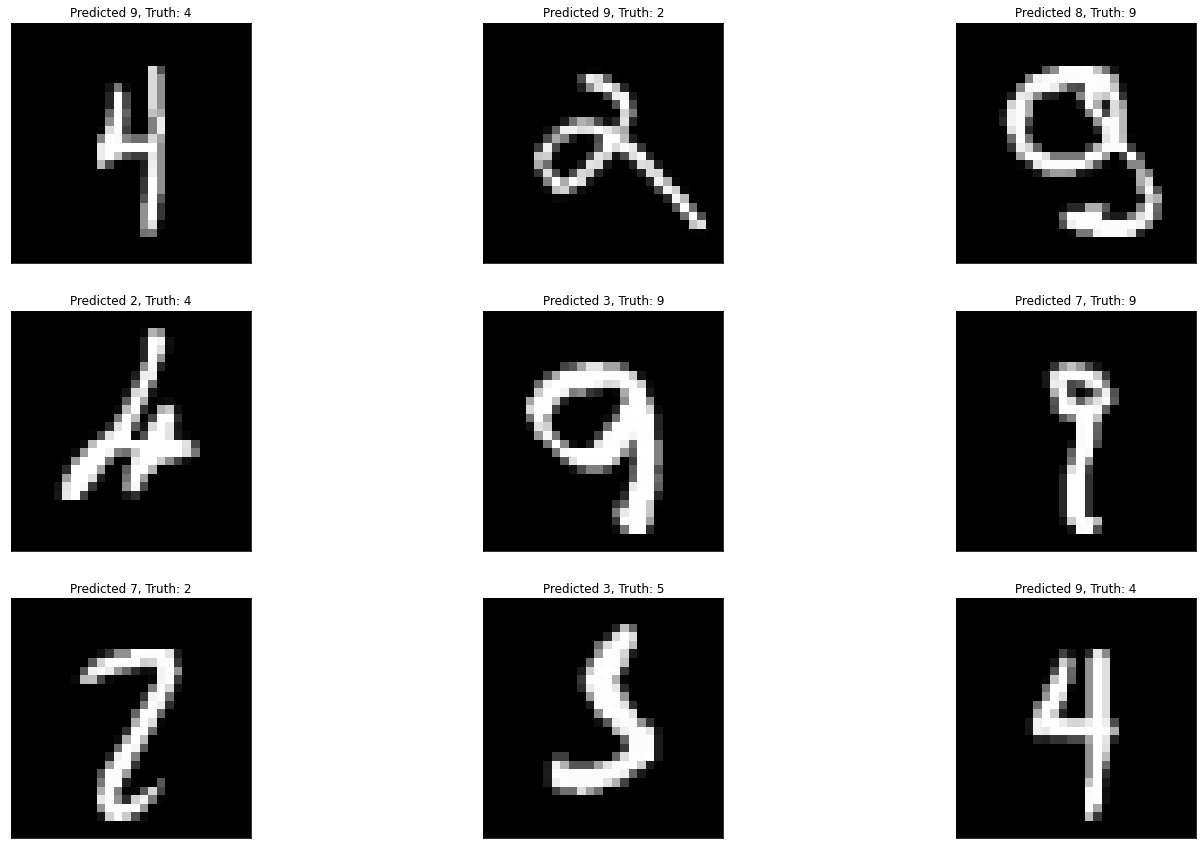

In [33]:
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print(len(incorrect_indices), "examples classified incorrectly")

figure_evaluation = plt.figure(figsize = (24, 15))

for i, incorrect in enumerate(incorrect_indices[:9], 1):
    plt.subplot(3, 3, i)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title(f"Predicted {predicted_classes[incorrect]}, Truth: {y_test[incorrect]}")
    plt.xticks([])
    plt.yticks([])